In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [3]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Select the numerical columns to normalize
crypto_features = df_market_data.select_dtypes(include=['float64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the data
df_market_data_scaled = pd.DataFrame(scaler.fit_transform(df_market_data[crypto_features]), columns=crypto_features)

# Display the first few rows of the normalized data
df_market_data_scaled.head()



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [4]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(df_market_data_scaled, columns=crypto_features)

# Copy the crypto names from the original DataFrame
df_scaled['coin_id'] = df_market_data.index

# Set the coin_id column as index
df_scaled.set_index('coin_id', inplace=True)

# Display the scaled DataFrame
df_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [5]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list of k-values
k_values


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [6]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using df_market_data_scaled
    kmeans.fit(df_market_data_scaled)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

# Display the inertia list
inertia



[287.0,
 212.1233420748626,
 170.19357087970297,
 79.02243535120975,
 71.0979135124442,
 66.1088267804475,
 54.48812315624117,
 43.224692666580424,
 32.86088447122681,
 28.404884636873092,
 24.116198421409198]

In [7]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow.head()


,k,inertia
0,1,287.000000
1,2,212.123342
2,3,170.193571
3,4,79.022435
4,5,71.097914


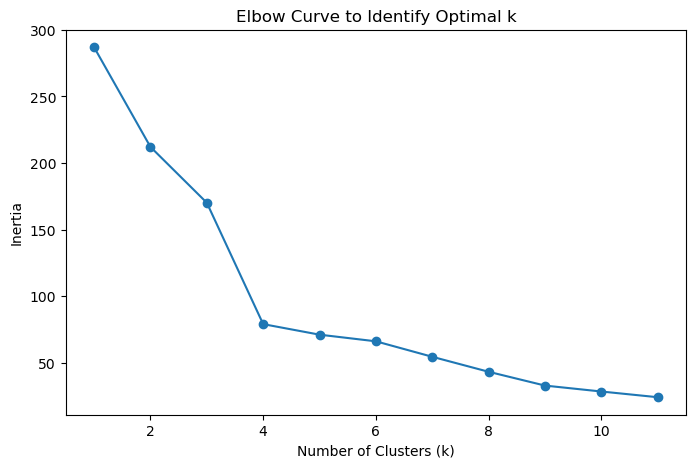

In [8]:
import matplotlib.pyplot as plt

# Plot a line chart with all the inertia values computed with the different values of k
plt.figure(figsize=(8, 5))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve to Identify Optimal k')
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Based on the elbow curve you provided, the optimal value for 
𝑘
k appears to be 4. This is where the slope starts to flatten noticeably, indicating a good balance between minimizing inertia and avoiding an excessive number of clusters.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [9]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=42)

# Display the initialized model
kmeans_model


KMeans(n_clusters=4, random_state=42)

In [10]:
# Fit the K-Means model using the scaled DataFrame
kmeans_model.fit(df_market_data_scaled)


KMeans(n_clusters=4, random_state=42)

In [11]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
crypto_clusters = kmeans_model.predict(df_market_data_scaled)

# Print the resulting array of cluster values
print(crypto_clusters)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [12]:
# Create a copy of the scaled DataFrame
df_scaled_copy = df_market_data_scaled.copy()

# Display the copied DataFrame
df_scaled_copy.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [13]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_scaled_copy['Cluster'] = crypto_clusters

# Display the updated DataFrame with the cluster column
df_scaled_copy.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [14]:
# Create a scatter plot with hvPlot
scatter_plot = df_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Cluster",
    hover_cols=["coin_id"],
    width=800,
    height=400,
    title="Cryptocurrency Clustering by Price Change"
)

# Display the scatter plot
scatter_plot


:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis.

In [15]:
from sklearn.decomposition import PCA

# Create a PCA model instance and set n_components=3
pca_model = PCA(n_components=3)

# Display the PCA model
pca_model



PCA(n_components=3)

In [16]:
# Use the PCA model with fit_transform to reduce the scaled DataFrame to three principal components
pca_data = pca_model.fit_transform(df_market_data_scaled)

# Convert the PCA data into a DataFrame for easier viewing
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Display the scaled PCA data
df_pca.head()


,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [17]:
# Retrieve the explained variance to determine the information attributed to each principal component
explained_variance = pca_model.explained_variance_ratio_

# Display the explained variance
explained_variance


array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is approximately 0.8950, or 89.50%. This means that 89.50% of the information in the original data is retained within the three principal components after dimensionality reduction.

In [18]:
# Create a new DataFrame with the PCA data
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original scaled DataFrame
df_pca['coin_id'] = df_market_data.index

# Set the coin_id column as index
df_pca.set_index('coin_id', inplace=True)

# Display the scaled PCA DataFrame
df_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [19]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list of k-values
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [20]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using df_pca
    kmeans.fit(df_pca)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

# Display the inertia list
inertia


[256.8740855678923,
 182.33953007775636,
 140.43183298408354,
 49.66549665179733,
 42.05190109791721,
 31.74900524438899,
 28.031869172552717,
 19.45174720604134,
 13.814081971558084,
 10.630647573870954,
 10.120242629957746]

In [21]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow.head()



,k,inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901


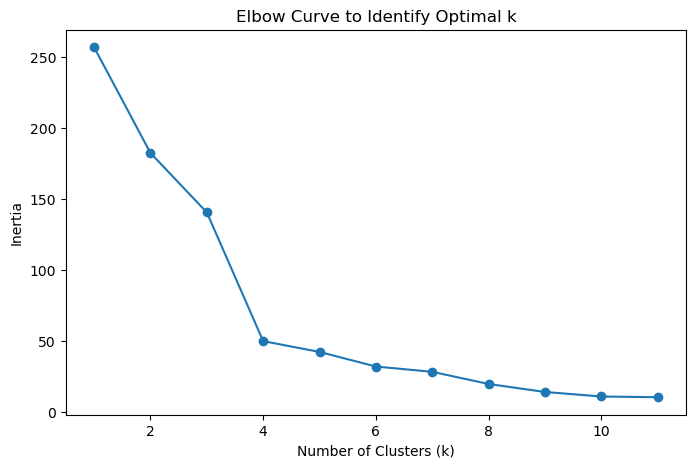

In [22]:
# Plot a line chart with all the inertia values computed with the different values of k
plt.figure(figsize=(8, 5))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve to Identify Optimal k')
plt.show()



#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Based on the elbow curve, the best value for 
𝑘
k when using the PCA data appears to be 4. This is where the inertia starts to decrease at a slower rate, indicating a reasonable balance between the number of clusters and the variance within them.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** This best 
𝑘
k value of 4 does not differ from the best 
𝑘
k value found using the original data. In both cases, 
𝑘
=
4
k=4 was identified as the optimal number of clusters, indicating consistency in the clustering structure with and without PCA.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [23]:
# Initialize the K-Means model using the best value for k
kmeans_model_pca = KMeans(n_clusters=4, random_state=42)

# Display the initialized model
kmeans_model_pca


KMeans(n_clusters=4, random_state=42)

In [24]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_pca)


KMeans(n_clusters=4, random_state=42)

In [25]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
crypto_clusters = kmeans_model.predict(df_pca)

# Print the resulting array of cluster values
print(crypto_clusters)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [26]:
# Create a copy of the scaled PCA DataFrame
df_pca_copy = df_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_copy['Cluster'] = crypto_clusters

# Display the updated DataFrame with the cluster column
df_pca_copy.head()


,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [27]:
# Create a scatter plot with hvPlot
scatter_plot = df_pca_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="Cluster",
    hover_cols=["coin_id"],
    width=800,
    height=400,
    title="Cryptocurrency Clustering by PCA Components"
)

# Display the scatter plot
scatter_plot



:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

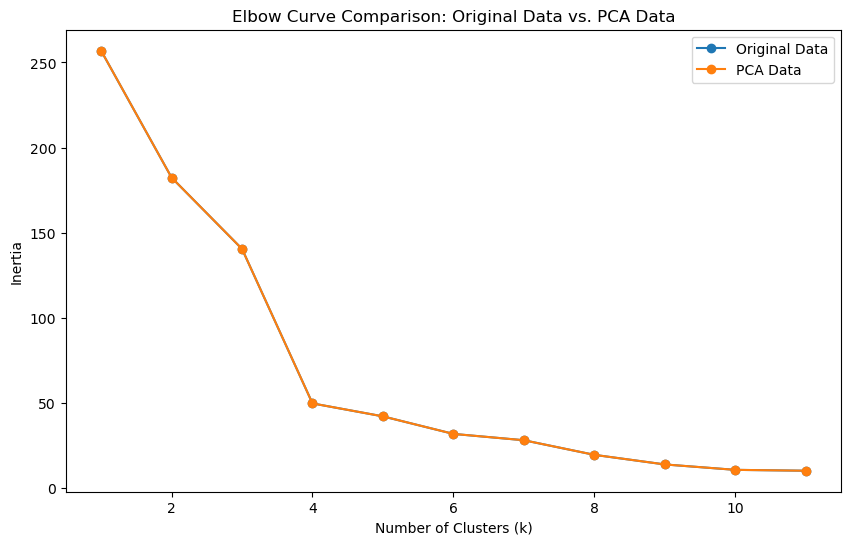

In [29]:
# Create an empty list to store the inertia values for the PCA-transformed data
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k for the PCA data
for k in k_values:
    # Initialize KMeans with the current value of k
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the PCA data
    kmeans.fit(df_pca)
    
    # Append the inertia to the inertia_pca list
    inertia_pca.append(kmeans.inertia_)

# Now you can plot the comparison
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', label='Original Data')
plt.plot(k_values, inertia_pca, marker='o', label='PCA Data')

# Add labels and title
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve Comparison: Original Data vs. PCA Data')
plt.legend()

# Display the plot
plt.show()



In [30]:
# Add the cluster labels to the original scaled DataFrame (if not already added)
df_scaled_copy['Cluster'] = crypto_clusters

# Create a scatter plot for the original scaled data
scatter_original = df_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Cluster",
    hover_cols=["coin_id"],
    width=400,
    height=400,
    title="Clusters in Original Data"
)

# Create a scatter plot for the PCA data
scatter_pca = df_pca_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="Cluster",
    hover_cols=["coin_id"],
    width=400,
    height=400,
    title="Clusters in PCA Data"
)

# Display the plots side by side
scatter_original + scatter_pca


:Layout
   .NdOverlay.I  :NdOverlay   [Cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)
   .NdOverlay.II :NdOverlay   [Cluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features through PCA simplifies the clustering but can result in less distinct clusters. In the original data, clusters are more separated, while in the PCA data with three components, clusters appear closer and less defined. This indicates that dimensionality reduction makes clustering easier to visualize but may slightly reduce the precision of cluster separation.